In [60]:
import pandas as pd

# Load the data - it's delimited by semicolons (this is unusual)
df = pd.read_csv('C:/Users/fanni/Documents/Code/MarkStuff/DS1.csv', delimiter=';')
df = df.drop(['Checks'], axis=1)
df = df.drop(['rTOL'], axis=1)
#drop row 29
df = df.drop(df.index[29])
df = df.drop(['name'], axis=1)

# Convert all numeric columns to float
for col in df.columns:
    if col != 'student' and col != 'name':
        # Check if the column contains strings that represent numbers
        if df[col].dtype == 'O':
            # Replace commas with periods and convert to float
            df[col] = df[col].str.replace(',', '.').astype(float)

#Calculate the average of the columns 'q1.1' to 'q1.5' and add it to the dataframe
df





KeyError: "['Checks'] not found in axis"

In [2]:

#order by increasing mark
df.sort_values(by=['mark'], inplace=True)
df.plot.bar(x='student', y='mark', rot=0)





c:\Users\fanni\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()
c:\Users\fanni\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\Users\fanni\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a

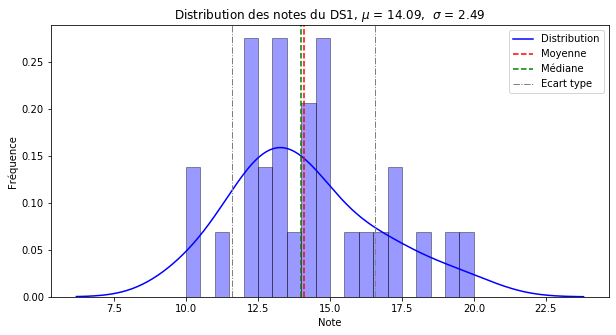

In [34]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Plot the histogram.
sns.distplot(df['mark'], hist=True,  
             bins=20, color = 'blue', 
            hist_kws={'edgecolor':'black'})

# Plot the PDF.
title = "Distribution des notes du DS1, $\mu$ = %.2f,  $\sigma$ = %.2f" % (df['mark'].mean(), df['mark'].std())
plt.title(title)
plt.xlabel('Note')
plt.ylabel('Fréquence')

#add the average mark and the standard deviation to the plot
plt.axvline(df['mark'].mean(), color='r', linestyle='--', linewidth=1.5)
plt.axvline(df['mark'].median(), color='g', linestyle='--', linewidth=1.5)
plt.axvline(df['mark'].mean() + df['mark'].std(), color='grey', linestyle='-.', linewidth=1)
plt.axvline(df['mark'].mean() - df['mark'].std(), color='grey', linestyle='-.', linewidth=1)
plt.legend(['Distribution','Moyenne','Médiane', 'Ecart type'])


#make the graph bigger
plt.rcParams["figure.figsize"] = (10,5)


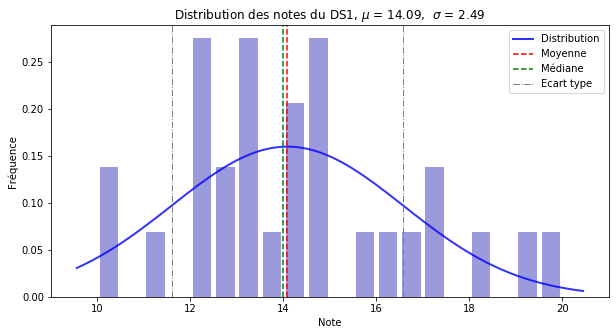

In [4]:

#check if the column 'mark' follows a gaussian distribution make the x axis the frequency and the y maxis the mark
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Plot the histogram.
plt.hist(df['mark'], bins=20, density=True, alpha=0.4, color='#0504aa',rwidth=0.8)

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, df['mark'].mean(), df['mark'].std())
plt.plot(x, p, 'b', linestyle='-', linewidth=2, alpha=0.8)
title = "Distribution des notes du DS1, $\mu$ = %.2f,  $\sigma$ = %.2f" % (df['mark'].mean(), df['mark'].std())
plt.title(title)
plt.xlabel('Note')
plt.ylabel('Fréquence')



#add the average mark and the standard deviation to the plot
plt.axvline(df['mark'].mean(), color='r', linestyle='--', linewidth=1.5)
plt.axvline(df['mark'].median(), color='g', linestyle='--', linewidth=1.5)
plt.axvline(df['mark'].mean() + df['mark'].std(), color='grey', linestyle='-.', linewidth=1)
plt.axvline(df['mark'].mean() - df['mark'].std(), color='grey', linestyle='-.', linewidth=1)

#add the median to the plot

plt.legend(['Distribution', 'Moyenne','Médiane', 'Ecart type'])

#strech out the x axis
plt.xlim(9, 21)
#make the graph bigger
plt.rcParams["figure.figsize"] = (10,5)

#save the plot
# plt.savefig('C:/Users/fanni/Documents/Code/MarkStuff/DS1.png', dpi=300, bbox_inches='tight')






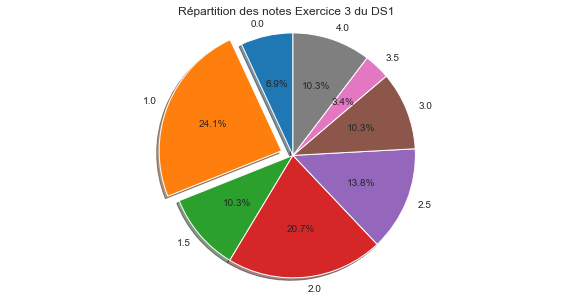

In [50]:

#calculate the frequency of each mark for 'q3' and make a pie chart of it
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#calculate the frequency of each mark for 'q3'
df_q3 = df.groupby('q3').count()
df_q3 = df_q3.drop(['student'], axis=1)
df_q3 = df_q3.rename(columns={'name': 'frequency'})
df_q3 = df_q3.reset_index()

#make a pie chart of it
labels = df_q3['q3']
sizes = df_q3['frequency']
explode = (0, 0.1, 0, 0, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'Very good')
#make the background white
sns.set_style("white")
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Répartition des notes Exercice 3 du DS1')
plt.show()


